# Machine Learning Cancer Analysis : Dawson Conlon

I have a cancer dataset containing a wealth of physical characteristics of cancer tumours. The objective of this analysis is to use this data to create a machine learning model that can predict whether a cancer tumour is benign or malignant. 

In [2]:
# Import modules 
#Data
import pandas as pd
import numpy as np

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("/Users/dawsonconlon/Data/Cancer_Data.csv")

print(df.info())

print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# Data Cleaning
I will have to convert diagnosis into a intiger but that is the only variable that will need that. 

In [4]:
# Data Cleaning and feature engineering
def pre_proccess_data(df):
    
    #Remove unwanted columns
    #df = df.drop(columns= [ "id"], inplace= True)
    
    #Convert categorical diagnosis data to numerical
    # Malignent = 1, Benign = 0
    df["diagnosis"] = df["diagnosis"].map({"M": 1, "B" : 0})
    
    
    # Feature engineering
    # Cancer malignancy is often about irregularity and disproportional growth.
    
    # Area to radius ratio
    df["area_radius_ratio_mean"] = df["area_mean"] / df["radius_mean"]
    
    # Perimeter to radius ratio
    df["perimeter_radius_ratio"] = df["perimeter_mean"] / df["radius_mean"]
    
    # concavity to compactness
    df["concavity_compactness"] = df["concavity_mean"] / df["compactness_mean"]
    
    return df

df = pre_proccess_data(df)
    
# Forgot tot remove this one column
df = df.drop(columns=["Unnamed: 32"])

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# Explority Data Analysis
I wan to explore what is the diffrence between B and M tumors

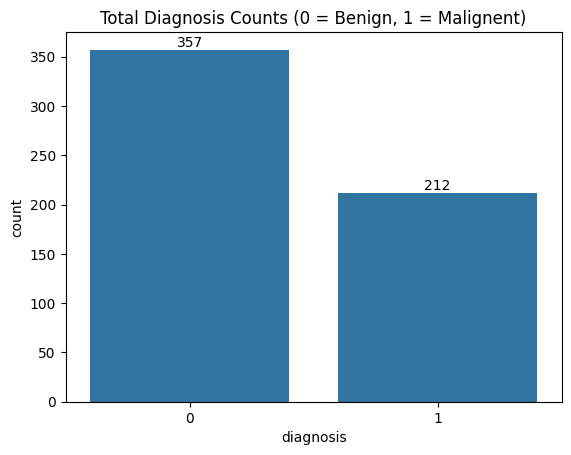

In [5]:
# Total B and M diagnosis counts

count = sns.countplot(x = "diagnosis", data = df)
plt.title("Total Diagnosis Counts (0 = Benign, 1 = Malignent)")
count.bar_label(count.containers[0], label_type='edge')
plt.show()

the are 145 more B diagnosis than M

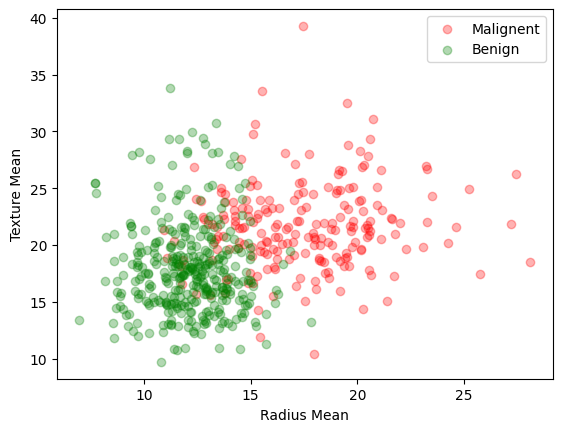

In [6]:
M = df[df.diagnosis == 1]
B = df[df.diagnosis == 0]

plt.scatter(M.radius_mean, M.texture_mean, color = "red", label = "Malignent", alpha = 0.3)
plt.scatter(B.radius_mean, B.texture_mean, color = "green", label = "Benign", alpha = 0.3)

plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")
plt.legend()
plt.show()


In [7]:
df.groupby("diagnosis")[["radius_mean", "texture_mean"]].mean()

,radius_mean,texture_mean
diagnosis,,
0,12.146524,17.914762
1,17.462830,21.604906


Malignant tumors tend to grow more aggressively and invade surrounding tissue, resulting in larger measured radii.

Higher texture indicates greater pixel intensity variation, meaning malignant tumors have:


	•More irregular cell structure
	•Increased heterogeneity

<Axes: >

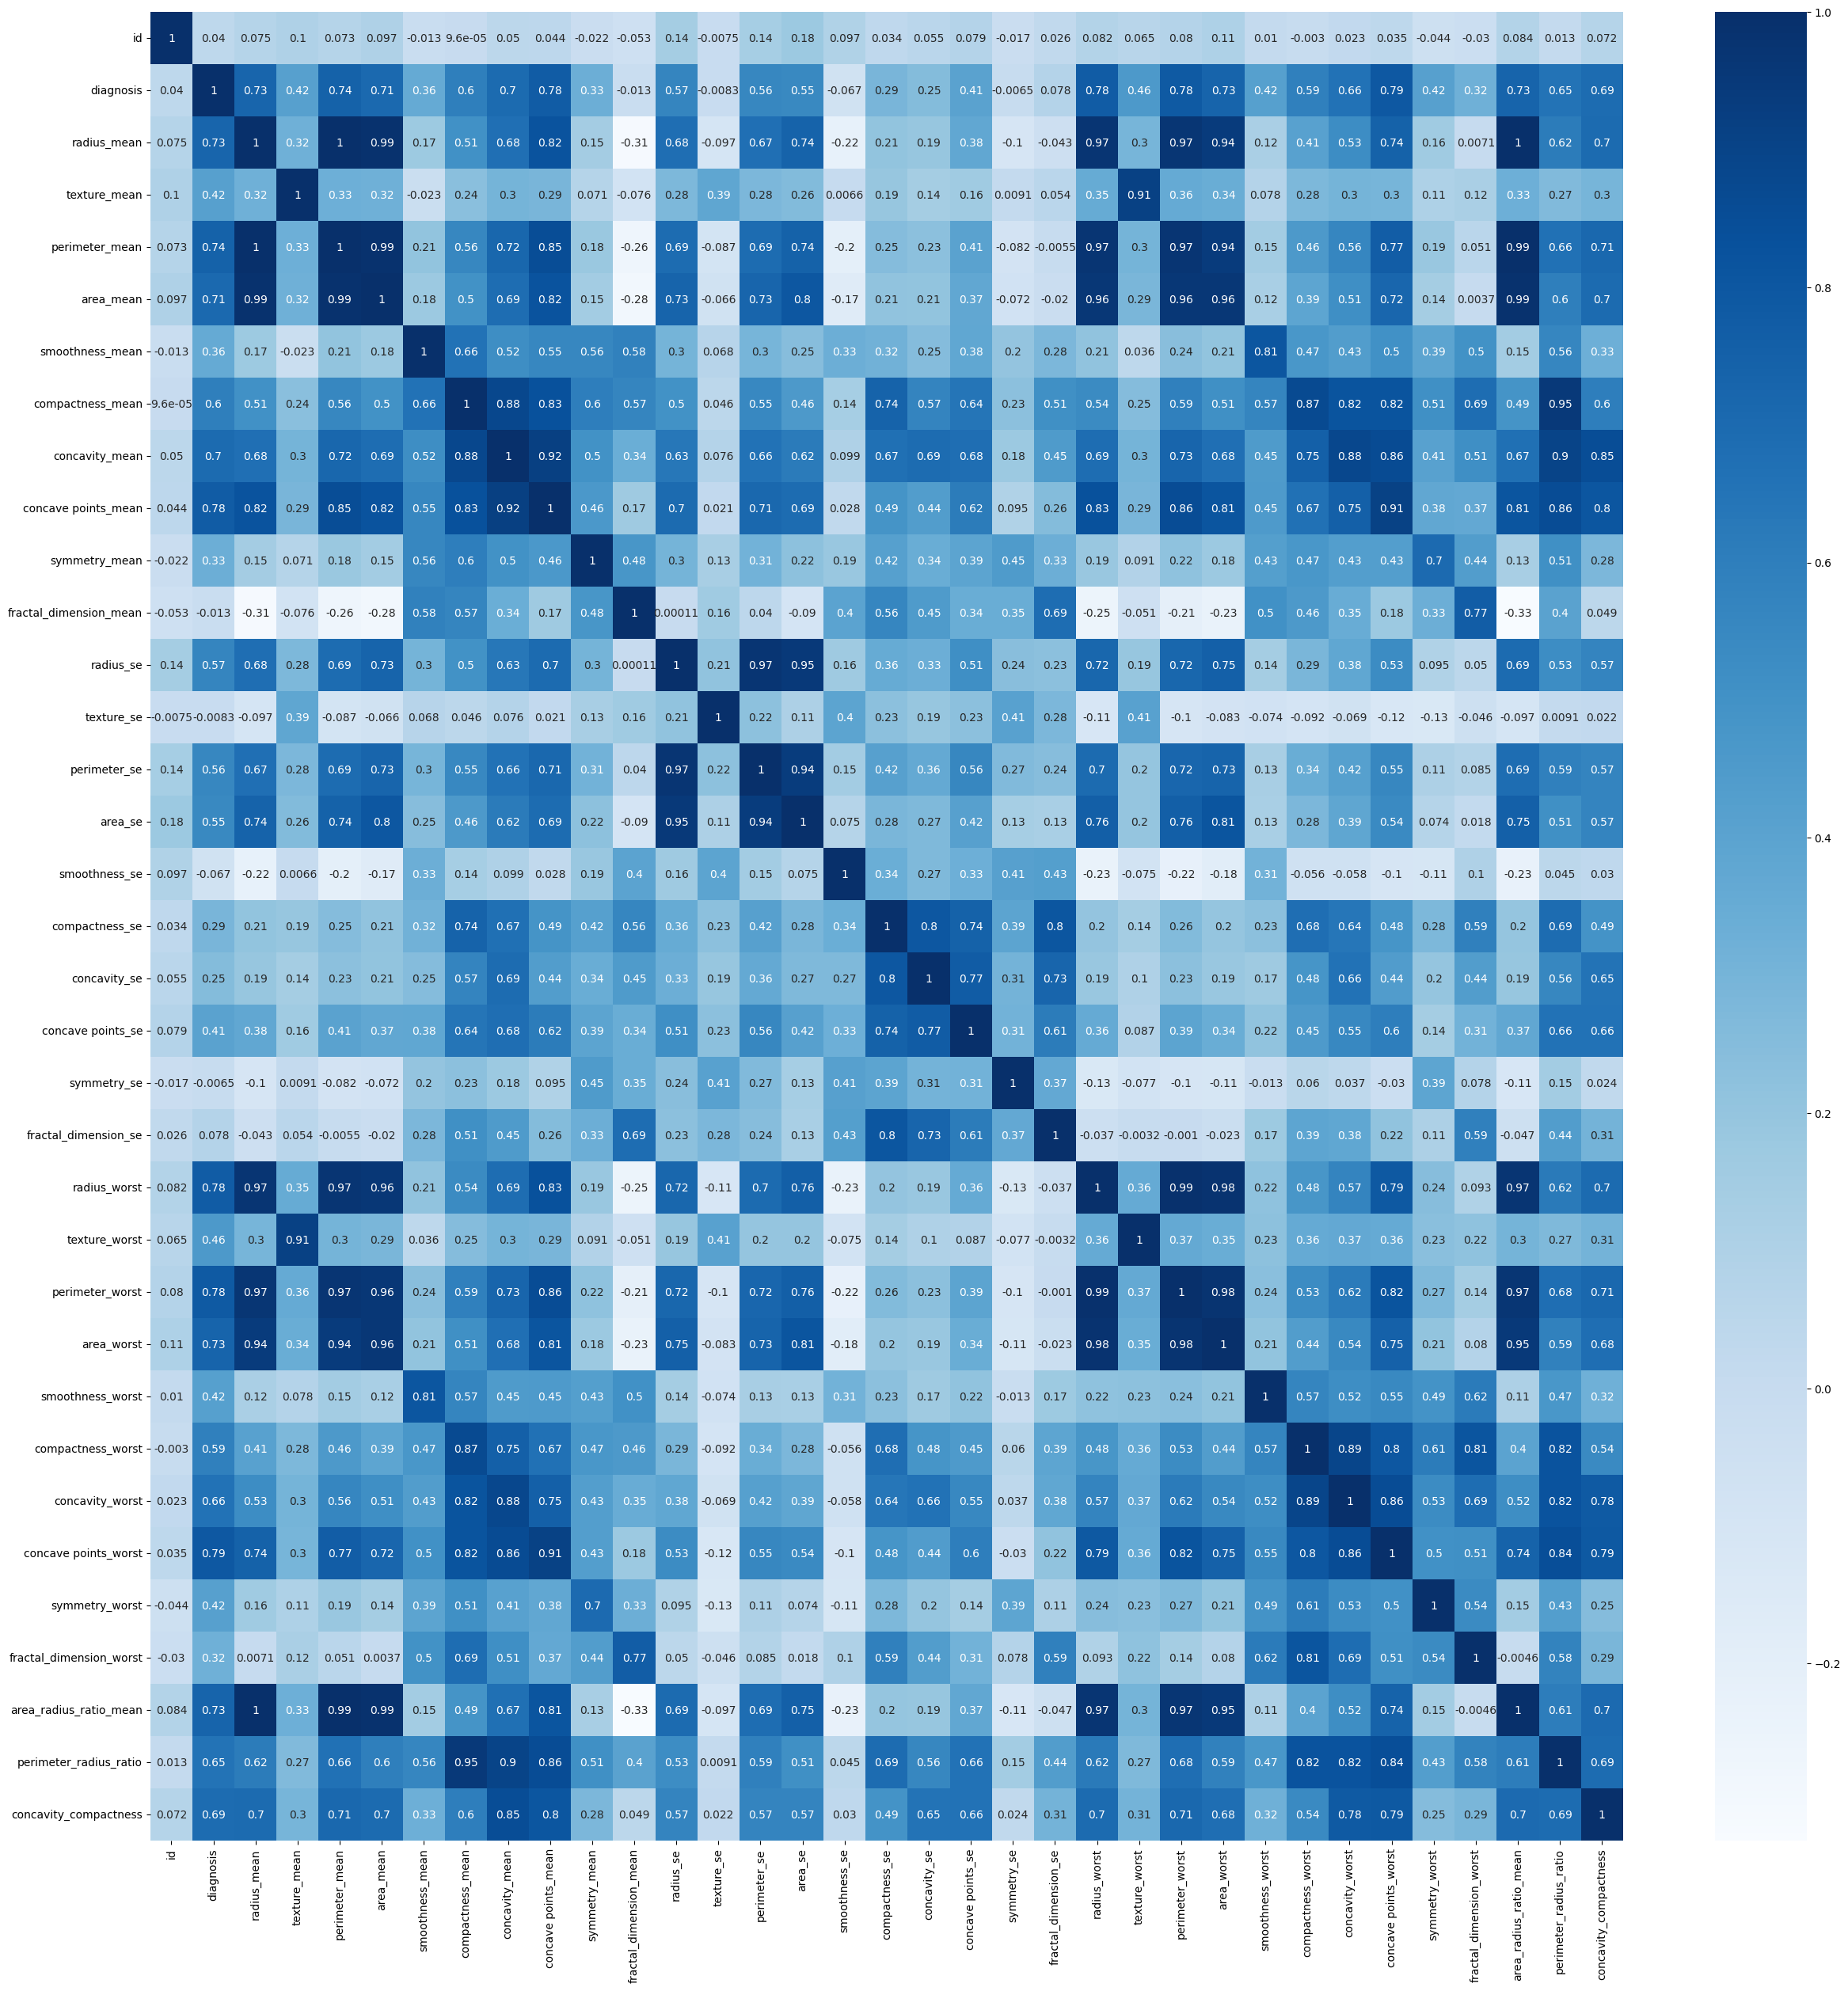

In [8]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), cbar=True, annot=True, cmap="Blues")

In [9]:
df.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,area_radius_ratio_mean,perimeter_radius_ratio,concavity_compactness
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,0.083959,0.012945,0.071731
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872,0.733530,0.654453,0.693388
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.997808,0.615185,0.696277
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.328844,0.267880,0.296706
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.994930,0.662669,0.712985
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.987043,0.595474,0.696533
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.153206,0.562923,0.328191
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.486391,0.948717,0.602314
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.668133,0.896460,0.853861
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.811519,0.859006,0.804567


I will now make two variables one for the target variable diagnosis
and one for the features

In [10]:
# Define features and target variable
x = df.drop(columns = ["diagnosis"]) # Features
y  = df["diagnosis"] # Target variable

nan_counts = x.isna().sum()
nan_counts[nan_counts > 0]

Series([], dtype: int64)

In [11]:
# Make trianing and testing data
# Computer will learn on 75% of data, test on 25%
# random_state for reproducibility
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

# ML preprocessing  
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train) # Front of flashcard
x_test = scaler.transform(x_test)   # Back of flashcard

# Hyperparamter Tuning
lets us get the best model possible for k-nearest-neighbour model and Logistical Regression.

In [12]:
def tune_model(x_train, y_train):
    
    parm_grid = {
        "n_neighbors" : range(1, 21),
        # euclidean checks for continouse features
        # manhattan checks if data is spread out
        # minkowski is a combo of both
        "metric" : ["euclidean", "manhattan", "minkowski"],
        "weights" : ["uniform", "distance"]
        
    }
    
    model = KNeighborsClassifier()
    grid_search = GridSearchCV(model, 
                               parm_grid, 
                               cv = 5, 
                               n_jobs= -1)
    
    grid_search.fit(x_train, y_train)
    
    return grid_search.best_estimator_

best_model = tune_model(x_train, y_train)


# Evaluating how the model performed

In [13]:
def evaluate_model(model, x_test, y_test):
    
    prediction = model.predict(x_test) # Only allowed ot see the flashcards not answers
    accuracy = accuracy_score(y_test, prediction) # Check answers
    matrix = confusion_matrix(y_test, prediction)
    
    return accuracy, matrix

accuracy, matrix = evaluate_model(best_model, x_test, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(matrix)



Accuracy: 97.20%
Confusion Matrix:
[[87  2]
 [ 2 52]]


In [14]:
model_dict = {
    "K-Neighbour" : accuracy}

# Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_train, y_train)

lr_accuracy, lr_matrix = evaluate_model(log_reg, x_test, y_test)

print(f"Accuracy: {lr_accuracy * 100:.2f}%")
print(lr_matrix)

model_dict["Logistic Regression"] = lr_accuracy

Accuracy: 98.60%
[[89  0]
 [ 2 52]]


/Users/dawsonconlon/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/dawsonconlon/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/dawsonconlon/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/dawsonconlon/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/dawsonconlon/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in matmul
  grad[:n_features

# SVM

In [16]:
from sklearn.svm import SVC

svm_model = SVC(kernel = "rbf", probability = True)
svm_model.fit(x_train, y_train)

svm_accuracy, svm_matrix = evaluate_model(svm_model, x_test, y_test)

print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")
print(svm_matrix)

model_dict["Support Vector Machine"] = svm_accuracy

SVM Accuracy: 97.90%
[[88  1]
 [ 2 52]]


# Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)

dt_accuracy, dt_matrix = evaluate_model(dt_model, x_test, y_test)

print(f"Decision Tree Accuracy: {dt_accuracy * 100:.2f}%")
print(dt_matrix)

model_dict["Decision Tree"] = dt_accuracy

Decision Tree Accuracy: 95.10%
[[85  4]
 [ 3 51]]


# Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)
rf_model.fit(x_train, y_train)

rf_accuracy, rf_matrix = evaluate_model(rf_model, x_test, y_test)

print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")
print(rf_matrix)

model_dict["Random Forest"] = rf_accuracy

Random Forest Accuracy: 96.50%
[[87  2]
 [ 3 51]]


# Naive Bayes 

In [19]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

nb_accuracy, nb_matrix = evaluate_model(nb_model, x_test, y_test)

print(f"Naive Bayes Accuracy: {nb_accuracy * 100:.2f}%")
print(nb_matrix)

model_dict["Naive Bayes"] = nb_accuracy

Naive Bayes Accuracy: 95.10%
[[85  4]
 [ 3 51]]


In [20]:
model_accuracy_df = pd.DataFrame(columns=["Model", "Accuracy"])
model_accuracy_df["Model"] = list(model_dict.keys())
model_accuracy_df["Accuracy"] = list(model_dict.values())

model_accuracy_df.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy
1,Logistic Regression,0.986014
2,Support Vector Machine,0.979021
0,K-Neighbour,0.972028
4,Random Forest,0.965035
3,Decision Tree,0.951049
5,Naive Bayes,0.951049


# Plotting Results

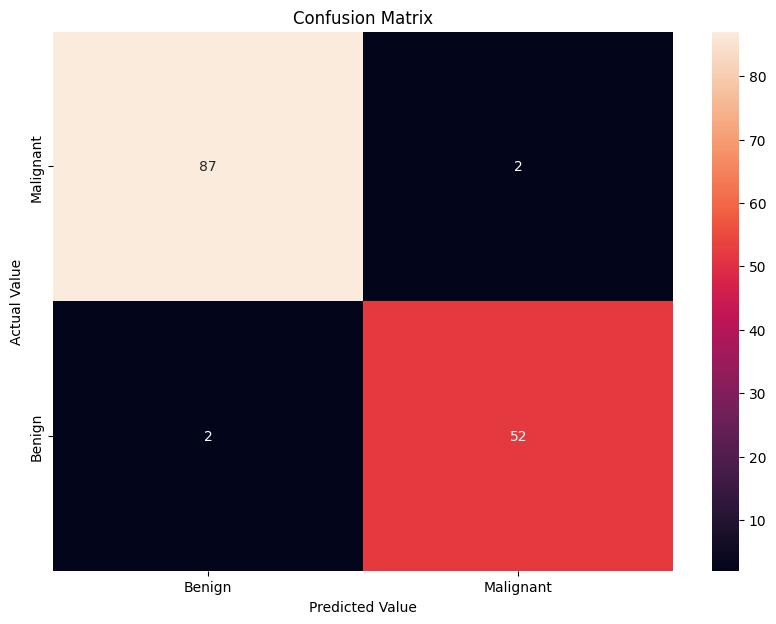

In [21]:
def plot_model(matrix):
    
    plt.figure(figsize= (10,7))
    sns.heatmap(matrix, annot = True, fmt="d", xticklabels=["Benign", "Malignant"], yticklabels=["Malignant", "Benign"] )
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Value")
    plt.ylabel("Actual Value")
    plt.show()
          
               
plot_model(matrix)      
    

# LR Plot

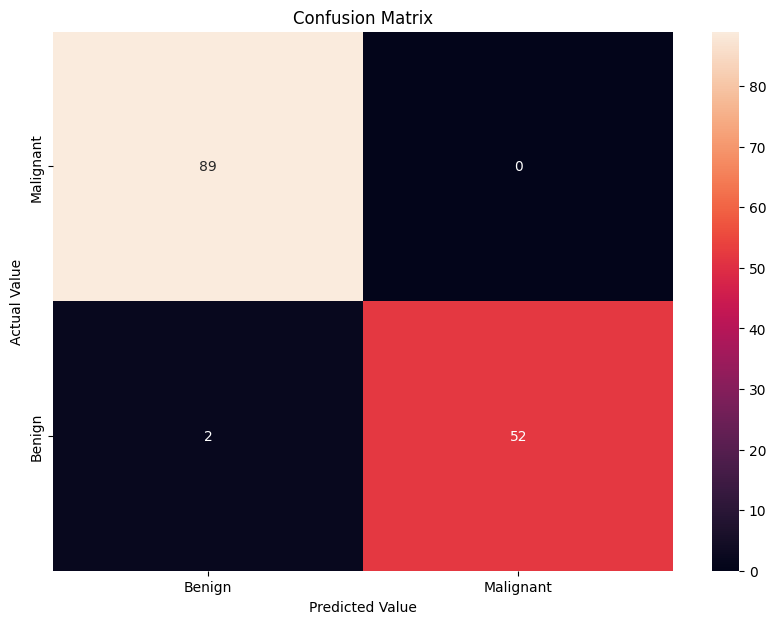

In [22]:
plot_model(lr_matrix)      
    


Why this is strong medically


	•	False negatives = 0 → very low risk of missing cancer
	•	False positives = 2 → minimal unnecessary stress/testing
	•	Balanced performance → not biased toward one class

The final model achieved an accuracy of 98.6% and demonstrated perfect sensitivity (100%), successfully identifying all malignant tumors in the dataset with no false negatives. This is particularly significant in a clinical context, where failing to detect cancer carries severe consequences. The model also maintained high specificity (96.3%), minimizing the misclassification of benign tumors. Overall, these results indicate that the model performs with high reliability and would be well-suited as a clinical decision-support tool to assist in tumor risk assessment, while not replacing physician judgment.